In [69]:
# Import required libraries
import pandas as pd
import numpy as np

# Import sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier


In [70]:
#read the data from excel sheet
data = pd.read_excel('F:/DASCM/SC.xlsx')


In [71]:
#print columns
data.columns

Index(['Order ID', 'Order Date', 'Origin Port', 'Carrier', 'TPT',
       'Service Level', 'Ship ahead day count', 'Ship Late Day count',
       'Customer', 'Plant Code', 'Destination Port', 'Unit quantity',
       'Weight'],
      dtype='object')

In [72]:
#Check missing values
data.isnull().sum()

Order ID                0
Order Date              0
Origin Port             0
Carrier                 0
TPT                     0
Service Level           0
Ship ahead day count    0
Ship Late Day count     0
Customer                0
Plant Code              0
Destination Port        0
Unit quantity           0
Weight                  0
dtype: int64

**EXPLORATIVE DATA ANALYSIS**

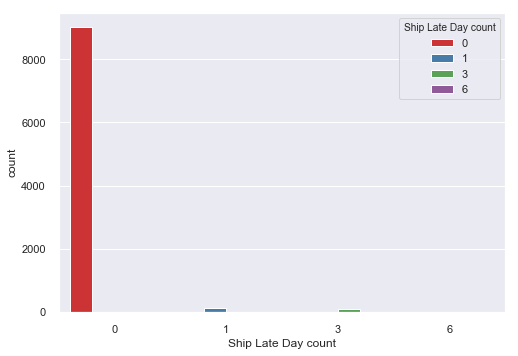

In [73]:
# Frequency of number of orders delayed and the number of days delayed
sns.set(style="darkgrid")
sns.countplot( x='Ship Late Day count', data=data, hue="Ship Late Day count", palette="Set1");

In [74]:
# Classsifying ship late day count as 0 and 1. if delay represent the column as 1 else 0
data['Delay'] = (data['Ship Late Day count'] > 0).astype(int)
data = data.drop(['Ship Late Day count'],axis=1)

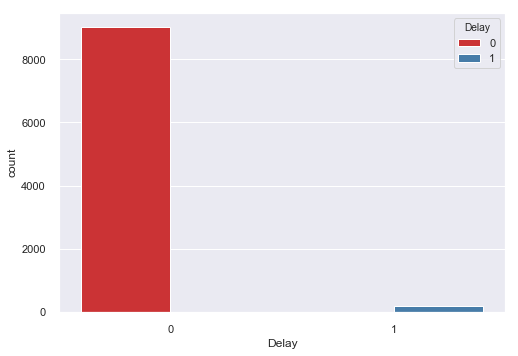

In [75]:
sns.set(style="darkgrid")
sns.countplot( x='Delay', data=data, hue="Delay", palette="Set1");

In [76]:
#Relation bw Service Level and delay 
tab = pd.crosstab(data['Service Level'], data['Delay'])
print(tab)

Delay             0    1
Service Level           
CRF             854    0
DTD            2134    9
DTP            6035  183


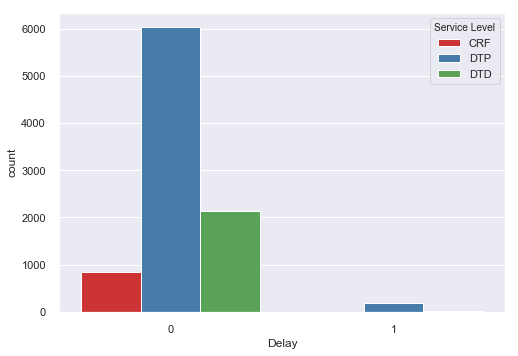

In [77]:
sns.set(style="darkgrid")
sns.countplot( x='Delay', data = data, hue="Service Level", palette="Set1");

In [78]:
#Relation bw carrier type and delay
tab = pd.crosstab(data['Carrier'], data['Delay'])
print(tab)

Delay       0    1
Carrier           
V444_0   6081  183
V444_1   2088    9
V44_3     854    0


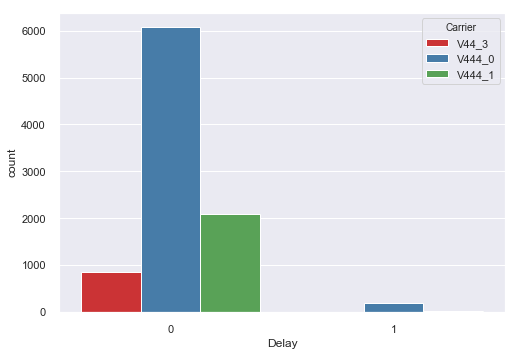

In [79]:
sns.set(style="darkgrid")
sns.countplot( x='Delay', data = data, hue="Carrier", palette="Set1");

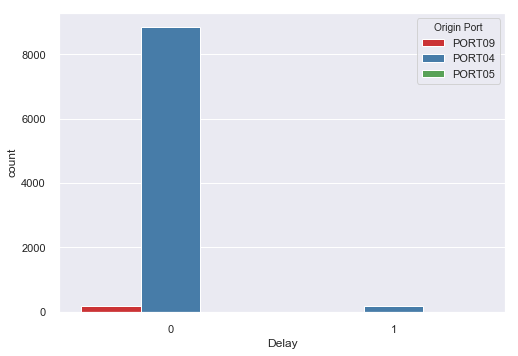

In [80]:
sns.set(style="darkgrid")
sns.countplot( x='Delay', data = data, hue="Origin Port", palette="Set1");

In [81]:
#Relation bw Plant Code and delay
tab = pd.crosstab(data['Plant Code'], data['Delay'])
print(tab)

Delay          0    1
Plant Code           
PLANT03     8367  174
PLANT04        1    0
PLANT08       84   18
PLANT09       12    0
PLANT12      300    0
PLANT13       86    0
PLANT16      173    0


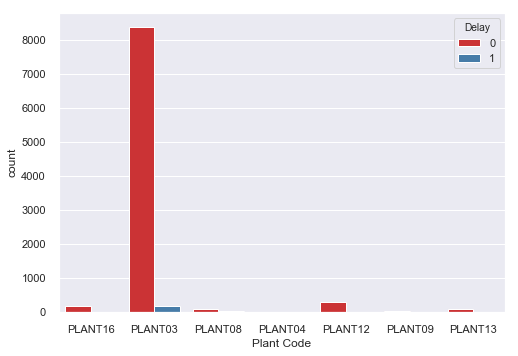

In [82]:
sns.set(style="darkgrid")
sns.countplot( x='Plant Code', data = data, hue="Delay", palette="Set1");

In [83]:
data = data.drop(['Order Date'],axis=1)  #Not significant feature

**Handling categorical Data type**

In [84]:
labelEncoder = LabelEncoder()
labelEncoder.fit(data['Service Level'])
data['Service Level'] = labelEncoder.transform(data['Service Level'])

In [85]:
labelEncoder = LabelEncoder()
labelEncoder.fit(data['Carrier'])
data['Carrier'] = labelEncoder.transform(data['Carrier'])

In [86]:
data['Plant Code'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
data['Plant Code'] = data['Plant Code'].astype(int)

In [87]:
data['Origin Port'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
data['Origin Port'] = data['Origin Port'].astype(int)

In [88]:
data['Destination Port'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
data['Destination Port'] = data['Destination Port'].astype(int)

In [89]:
data['Ahead'] = (data['Ship ahead day count'] > 0).astype(int)
data = data.drop(['Ship ahead day count'],axis=1)

In [90]:
data.head()

,Order ID,Origin Port,Carrier,TPT,Service Level,Customer,Plant Code,Destination Port,Unit quantity,Weight,Delay,Ahead
0,1.447296e+09,9,2,1,0,11039000000,16,9,808,14.30,0,1
1,1.447158e+09,9,2,1,0,11039000000,16,9,3188,87.94,0,1
2,1.447139e+09,9,2,1,0,11039000000,16,9,2331,61.20,0,1
3,1.447364e+09,9,2,1,0,11039000000,16,9,847,16.16,0,1
4,1.447364e+09,9,2,1,0,11039000000,16,9,2163,52.34,0,1


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 12 columns):
Order ID            9215 non-null float64
Origin Port         9215 non-null int32
Carrier             9215 non-null int32
TPT                 9215 non-null int64
Service Level       9215 non-null int32
Customer            9215 non-null int64
Plant Code          9215 non-null int32
Destination Port    9215 non-null int32
Unit quantity       9215 non-null int64
Weight              9215 non-null float64
Delay               9215 non-null int32
Ahead               9215 non-null int32
dtypes: float64(2), int32(7), int64(3)
memory usage: 612.0 KB


In [92]:
data['Order ID'] = data['Order ID'].astype(int)
data['Weight'] = data['Weight'].astype(int)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 12 columns):
Order ID            9215 non-null int32
Origin Port         9215 non-null int32
Carrier             9215 non-null int32
TPT                 9215 non-null int64
Service Level       9215 non-null int32
Customer            9215 non-null int64
Plant Code          9215 non-null int32
Destination Port    9215 non-null int32
Unit quantity       9215 non-null int64
Weight              9215 non-null int32
Delay               9215 non-null int32
Ahead               9215 non-null int32
dtypes: int32(9), int64(3)
memory usage: 540.0 KB


In [94]:
data = data.drop(['Destination Port'],axis=1)

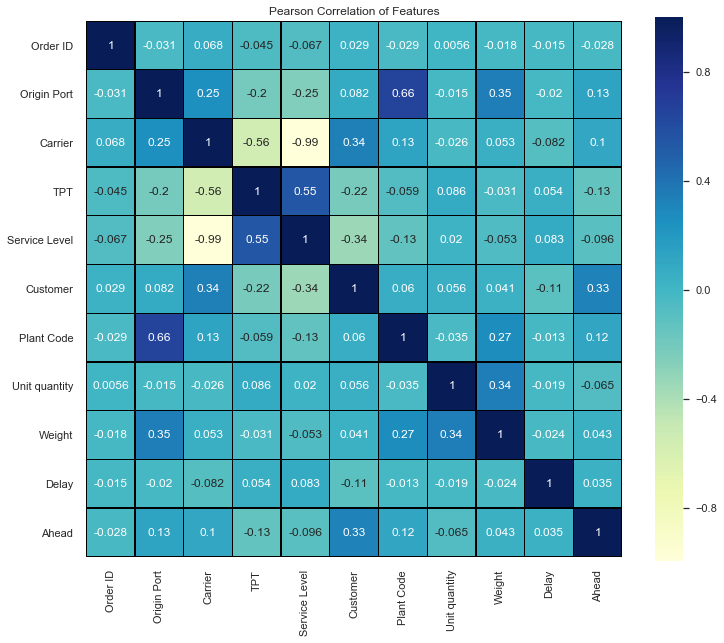

In [95]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Features')
# Draw the heatmap using seaborn
sns.heatmap(data.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

**Modeling**

In [96]:
#drop target variable 'delay' and store it in another variable y 
X = data.drop('Delay',axis=1)
y =data['Delay']

In [97]:
#split data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [98]:
X_train.shape

(7372, 10)

In [99]:
X_test.shape

(1843, 10)

In [100]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Chaitra\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Chaitra\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Chaitra\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  


**Fit RF model**

In [101]:
from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)


C:\Users\Chaitra\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

C:\Users\Chaitra\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


=== Confusion Matrix ===
[[1789    3]
 [   9   42]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1792
           1       0.93      0.82      0.87        51

   micro avg       0.99      0.99      0.99      1843
   macro avg       0.96      0.91      0.94      1843
weighted avg       0.99      0.99      0.99      1843



=== All AUC Scores ===
[0.9994186  1.         1.         0.99617808 0.99997083 0.66699732
 0.99950403 0.99903723 0.99956238 0.76315789]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9423826353513342


In [104]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(data, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Delay                Importance: 0.37
Variable: Customer             Importance: 0.36
Variable: Order ID             Importance: 0.11
Variable: Unit quantity        Importance: 0.09
Variable: Weight               Importance: 0.05
Variable: Plant Code           Importance: 0.02
Variable: Origin Port          Importance: 0.0
Variable: Carrier              Importance: 0.0
Variable: TPT                  Importance: 0.0
Variable: Service Level        Importance: 0.0


**Paramter Test - find optimal values for n_estimors, max_depth**

In [105]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.7min finished


{'n_estimators': 600, 'max_features': 'auto', 'max_depth': 180}


In [106]:
rfc = RandomForestClassifier(n_estimators=600, max_depth=180, max_features='auto')
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[1790    2]
 [   7   44]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1792
           1       0.96      0.86      0.91        51

   micro avg       1.00      1.00      1.00      1843
   macro avg       0.98      0.93      0.95      1843
weighted avg       1.00      1.00      0.99      1843



=== All AUC Scores ===
[0.99831118 1.         1.         0.99766601 1.         0.77961256
 1.         1.         0.99982495 0.75606839]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9531483083643725


**--------------------------------------------------------**